In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10

In [7]:
# MovieLens 1M Dataset

users = pd.read_table('datasets/movielens/users.dat', sep='::', header = None, 
                      engine = 'python')
users[:5]

#There is a need to rename columns. Can do it post but better to do it while reading

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
u_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header = None, names = u_names)
users[:5]



E:\Anaconda\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
#Similarily for other data
r_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep = '::', header = None, 
                       names = r_names)
ratings[:5]

E:\Anaconda\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
m_names = ['movie_id', 'title', 'genre']
movies = pd.read_table('datasets/movielens/movies.dat', sep = '::',
                      header = None, names = m_names)
movies[:5]

E:\Anaconda\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# Merged into single data object
data = pd.merge(pd.merge(ratings, users), movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [17]:
data.iloc[2]

user_id                                           12
movie_id                                        1193
rating                                             4
timestamp                                  978220179
gender                                             M
age                                               25
occupation                                        12
zip                                            32793
title         One Flew Over the Cuckoo's Nest (1975)
genre                                          Drama
Name: 2, dtype: object

In [19]:
# Mean movie ratings grouped by gender
mean_ratings = data.pivot_table('rating', index = 'title', 
                                columns = 'gender', aggfunc = 'mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [20]:
# lets only take those movies that have been rated atleast 250 times
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]


title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [21]:
active_titles = ratings_by_title.index[ratings_by_title > 250]
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

In [22]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [24]:
top_female_ratings = mean_ratings.sort_values(by = 'F', 
                                              ascending = False)
top_female_ratings[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [26]:
# Measuring Ratings Disagreement

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by = 'diff')

sorted_by_diff[:10]



gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [27]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [30]:
# Standard deviation of rating grouped by title

rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title[:5]

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [33]:
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title = rating_std_by_title.sort_values(ascending = False)[:10]



## US Baby Names Dataset

In [4]:
import pandas as pd

In [2]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                       names = ['name', 'sex', 'births'])
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
# files only contain names with at least five occurrences in each year, so for simplicity’s
# sake we can use the sum of the births column by sex as the total number of
# births in that year

names1880.groupby('sex').births.sum()


sex
F     90993
M    110493
Name: births, dtype: int64

In [4]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

    
# required to combine everything into a single data object
names = pd.concat(pieces, ignore_index = True)


In [42]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<AxesSubplot:title={'center':'Total births by Sex and Year'}, xlabel='year'>

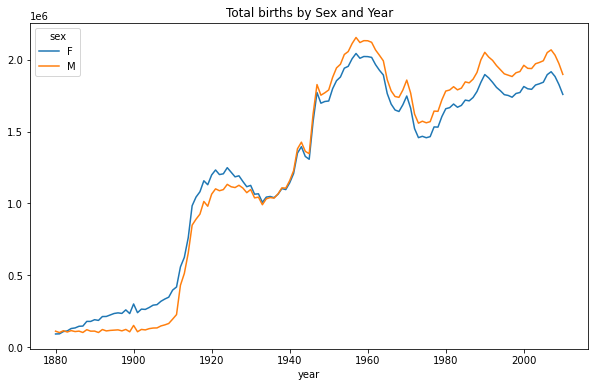

In [5]:
total_births = names.pivot_table('births', index = 'year', 
                                columns = 'sex', aggfunc = sum)
total_births[:5]
total_births.plot(title = 'Total births by Sex and Year')


In [6]:
# let’s insert a column prop with the fraction of babies given each name relative to
# the total number of births. A prop value of 0.02 would indicate that 2 out of every
# 100 babies were given a particular name. Thus, we group the data by year and sex,
# then add the new column to each group

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [7]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [8]:
# I’m going to extract a subset of the data to facilitate further
# analysis: the top 1,000 names for each sex/year combination. This is yet another
# group operation:

def get_1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_1000)
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [9]:
## Analyzing Name Trends

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index = 'year', columns = 'name',aggfunc = sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

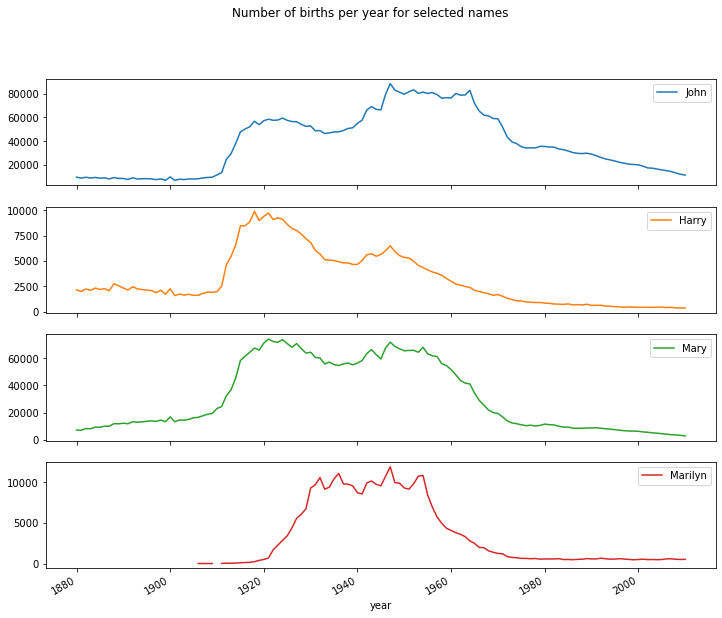

In [10]:
# lets plot for a handful of names
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = (12,10), grid = False, 
            title = "Number of births per year for selected names")


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

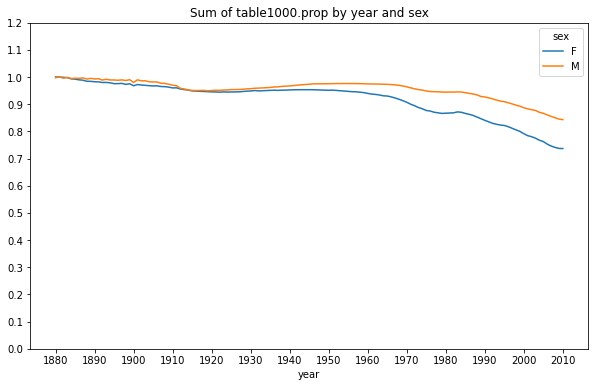

In [11]:
# Measuring the increase in naming diversity

table = top1000.pivot_table('prop', index = 'year', columns = 'sex', 
                           aggfunc = sum)

table.plot(title = 'Sum of table1000.prop by year and sex', 
           yticks= np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [12]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [13]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [14]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [15]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:xlabel='year'>

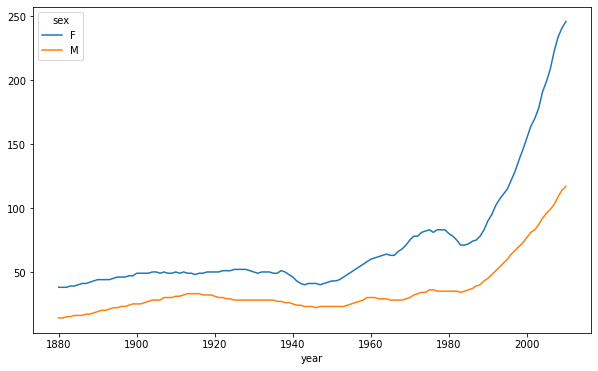

In [16]:
diversity.plot()

In [19]:
# Last letter Revolution
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index = last_letters, columns = ['sex', 'year'],
                              aggfunc = sum)

In [20]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [21]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [22]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

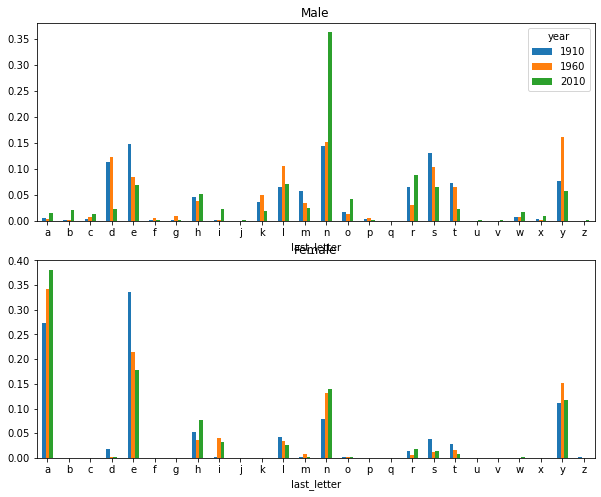

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize = (10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend = False)

In [24]:
letter_prop = table / table.sum() 
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<AxesSubplot:xlabel='year'>

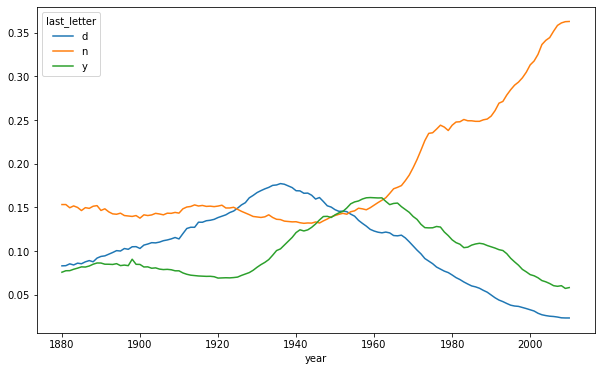

In [25]:
dny_ts.plot()

In [26]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [27]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [29]:
table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

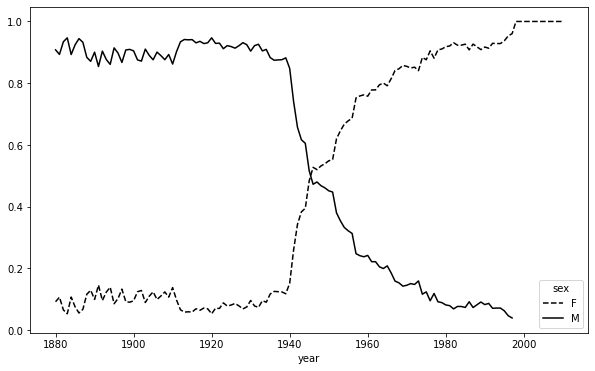

In [30]:
table.plot(style={'M': 'k-', 'F': 'k--'})

# USDA Food Database

In [2]:
# Reading in the json file
import json

db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [3]:
# Each entry in db is a dict containing all the data for a single food. The 'nutrients'
# field is a list of dicts, one for each nutrient:

db[0].keys()



dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [5]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [4]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [8]:
# When converting a list of dicts to a DataFrame, we can specify a list of fields to
# extract.

info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns = info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [9]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [10]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [11]:
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [12]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [13]:
#ABANDON

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [14]:
#2012 Federal Election Commission Database
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

fec.info()



E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [16]:
fec.iloc[123]

cmte_id                  C00410118
cand_id                  P20002978
cand_nm         Bachmann, Michelle
contbr_nm          RAINEY, PATRICK
contbr_city          WINTER GARDEN
                       ...        
receipt_desc                   NaN
memo_cd                        NaN
memo_text                      NaN
form_tp                      SA17A
file_num                    736166
Name: 123, Length: 16, dtype: object

In [17]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [18]:
parties = {'Bachmann, Michelle': 'Republican',
'Cain, Herman': 'Republican',
'Gingrich, Newt': 'Republican',
'Huntsman, Jon': 'Republican',
'Johnson, Gary Earl': 'Republican',
'McCotter, Thaddeus G': 'Republican',
'Obama, Barack': 'Democrat',
'Paul, Ron': 'Republican',
'Pawlenty, Timothy': 'Republican',
'Perry, Rick': 'Republican',
"Roemer, Charles E. 'Buddy' III": 'Republican',
'Romney, Mitt': 'Republican',
'Santorum, Rick': 'Republican'}

In [21]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [22]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [25]:
#Add the mapping as a column

fec['party'] = fec.cand_nm.map(parties)
fec[123:133]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
123,C00410118,P20002978,"Bachmann, Michelle","RAINEY, PATRICK",WINTER GARDEN,FL,3.47772e+08,INTL TRADING COMPANY,BROKER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
124,C00410118,P20002978,"Bachmann, Michelle","BOHNE, EDWARD",FORT LAUDERDALE,FL,3.33044e+08,BOAT WORKS,BUSINESS EXCUTIVE,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
125,C00410118,P20002978,"Bachmann, Michelle","SIMMS, JOHN",MIAMI,FL,3.31868e+08,RETIRED,RETIRED,400.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
126,C00410118,P20002978,"Bachmann, Michelle","MCCLELLAN III, S GRIFFIN",VERO BEACH,FL,32963,NONE,RETIRED,500.0,13-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
127,C00410118,P20002978,"Bachmann, Michelle","HEINEMAN, NICHOLAS",PALM COAST,FL,3.21373e+08,NONE,RETIRED,250.0,16-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
128,C00410118,P20002978,"Bachmann, Michelle","SANDHAM, EDWIN",PALM CITY,FL,3.49902e+08,NONE,RETIRED,350.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
129,C00410118,P20002978,"Bachmann, Michelle","FERNANDEZ, CRISTINA",MIAMI,FL,3.31556e+08,RETIRED,RETIRED,100.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
130,C00410118,P20002978,"Bachmann, Michelle","FERNANDEZ, CRISTINA",MIAMI,FL,3.31556e+08,RETIRED,RETIRED,200.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
131,C00410118,P20002978,"Bachmann, Michelle","ADAMS, JAY",DAYTONA BEACH,FL,3.21185e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
132,C00410118,P20002978,"Bachmann, Michelle","CHILDRESS, THOMAS",DALTON,GA,3.07215e+08,FLOOR PRODUCTIONS.COM,OWNER,250.0,11-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican


In [31]:
fec[fec.columns[16]]


0          Republican
1          Republican
2          Republican
3          Republican
4          Republican
              ...    
1001726    Republican
1001727    Republican
1001728    Republican
1001729    Republican
1001730    Republican
Name: party, Length: 1001731, dtype: object

In [33]:
fec.loc[0:100, ['cand_nm','party']]

,cand_nm,party
0,"Bachmann, Michelle",Republican
1,"Bachmann, Michelle",Republican
2,"Bachmann, Michelle",Republican
3,"Bachmann, Michelle",Republican
4,"Bachmann, Michelle",Republican
...,...,...
96,"Bachmann, Michelle",Republican
97,"Bachmann, Michelle",Republican
98,"Bachmann, Michelle",Republican
99,"Bachmann, Michelle",Republican


In [34]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [35]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [36]:
fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [37]:
#Donation statistics by Occupation and Employer

fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [38]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

In [39]:
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [40]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [41]:
f= lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [43]:
# use pivot_table to aggregate the data by party and occupation, then
# filter down to the subset that donated at least $2 million overall:

by_occupation = fec.pivot_table('contb_receipt_amt',
                               index = 'contbr_occupation',
                               columns = 'party',
                               aggfunc = sum)
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm


party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


<AxesSubplot:ylabel='contbr_occupation'>

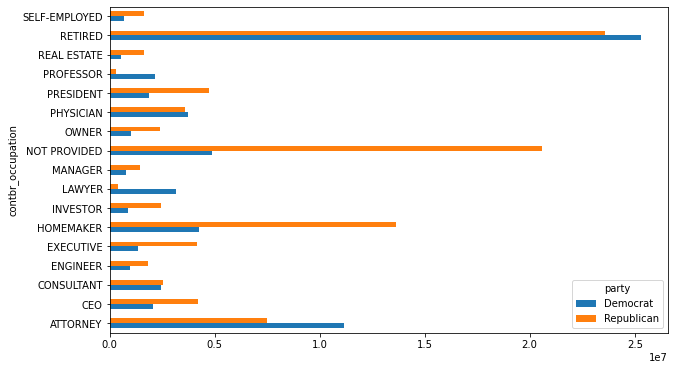

In [44]:
over_2mm.plot(kind='barh')

In [46]:
def get_top_amounts(group, key, n =5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
    


In [48]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [49]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

In [52]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
.....: 100000, 1000000, 10000000])

labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [53]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [54]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN
